# Содержание

* [Исследование надёжности заёмщиков](#first-bullet)
* [Шаг 1. Общая информация о файле](#second-bullet)
* [Шаг 2. Предобработка данных](#third-bullet)
* [Шаг 3. Ответьте на вопросы](#fourth-bullet)
* [Шаг 4. Общий вывод](#fifth-bullet)

# Исследование надёжности заёмщиков <a class="anchor" id="first-bullet"></a>

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

Для решения поставленной задачи выделим основные этапы работы:

* изучить общую информацию о данных
* выполнить предобработку данных
* ответить на вопросы о наличии взаимосвязи между семейным положением, количеством детей, уровнем дохода, целями кредита и вероятностью возврата кредита в срок

Для работы нам необходимо загрузить файл формата .csv, который расположен по адресу '/datasets/data.csv'.

Таблица состоит из 12 столбцов:

* children — количество детей в семье
* days_employed — общий трудовой стаж в днях
* dob_years — возраст клиента в годах
* education — уровень образования клиента
* education_id — идентификатор уровня образования
* family_status — семейное положение
* family_status_id — идентификатор семейного положения
* gender — пол клиента
* income_type — тип занятости
* debt — имел ли задолженность по возврату кредитов
* total_income — ежемесячный доход
* purpose — цель получения кредита

### Шаг 1. Общая информация о файле <a class="anchor" id="second-bullet"></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Загрузим данные и сохраним в переменную credit_df

credit_df = pd.read_csv('/datasets/data.csv')

In [4]:
# Выведем первые и последние 5 строк для просмотра структуры датафрэйма

credit_df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


In [5]:
# Посмотрим общую информацию о датафрэйме

credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


В таблице имеется 12 столбцов и 21525 наблюдений (строк), тип данных у каждого столбца - non-null object.

Подробно разберём, какие имеются столбцы и какую информацию они содержат:

* children — количество детей в семье
* days_employed — общий трудовой стаж в днях
* dob_years — возраст клиента в годах
* education — уровень образования клиента
* education_id — идентификатор уровня образования
* family_status — семейное положение
* family_status_id — идентификатор семейного положения
* gender — пол клиента
* income_type — тип занятости
* debt — имел ли задолженность по возврату кредитов
* total_income — ежемесячный доход
* purpose — цель получения кредита

Количество значений в столбцах различается. Это говорит о том, что в данных есть NaN значения.

### Вывод

Датафрэйм состоит из 12 переменных (столбцов) и 21525 наблюдений (строк).

Каждая строка содержит информацию о заемщиках: уровень образования, пол, за счет чего заемщик получает доход, уровень дохода, семейный статус, а также цель получения кредита.

Уже на предварительном этапе с помощью метода .info() можно увидеть проблемы: в столбцах 'days_employed' (стаж работы),  'total_income' (ежемесячный доход) имеются пропущенные значения, которые нам необходимо будет заполнить. Причиной формирования пропусков мог быть программный сбой на этапе выгрузки данных, в противном случае вряд ли число пропусков в столбце 'days_employed' равнялось бы числу пропусков в столбце 'total_income'. Судя по тому, что число пропусков в каждой из колонок одинаково, можно предположить, что механизм формирования пропусков не случайный, а в виду некоторых закономерностей (Missing At Random).

Можно заметить, что имеются проблемы в структуре датафрэйма: 

* отрицательные значения в переменной days_employed (трудовой стаж)
* в переменной education сведения об образовании, написанные разным регистром, будут восприниматься, как два разных значения, поэтому необходимо привести их к одному
* в переменной purpose можно увидеть значения: "на покупку своего автомобиля" и "на покупку автомобиля" - они очень похожи, и будет необходимо записать это таким образом, чтобы произошло объединение в одну категорию. Подробнее вернемся к подобным проблемам на стадии лемматизации.

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Подумай также о возможных причинах появления пропусков, а также о том, являются ли они случайными или нет.

Первый взгляд на таблицу выполнен.

</div>

### Шаг 2. Предобработка данных <a class="anchor" id="third-bullet"></a>

### Идентификация и обработка аномальных значений

Проверим данные на наличие в них аномальных значений в порядке расположения переменных, начнем с переменной 'children'. Для выявления таких значений, попробуем сгруппировать данные по income_type, и вычислить средние значения для каждой группы

In [6]:
# Сгруппируем данные по переменной 'income_type', и посчитаем средние значения для других переменных

credit_df.groupby('income_type').mean()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
income_type,,,,,,,
безработный,0.500000,366413.652744,38.000000,0.500000,0.500000,0.500000,131339.751676
в декрете,2.000000,-3296.759962,39.000000,1.000000,0.000000,1.000000,53829.130729
госслужащий,0.622344,-3399.896902,40.636737,0.671693,0.857437,0.058944,170898.309923
компаньон,0.598623,-2111.524398,39.697542,0.715438,1.032448,0.073943,202417.461462
пенсионер,0.132002,365003.491245,59.063019,0.913900,0.985737,0.056017,137127.465690
предприниматель,0.000000,-520.848083,42.500000,0.000000,0.500000,0.000000,499163.144947
сотрудник,0.641784,-2326.499216,39.821027,0.849627,0.955661,0.095422,161380.260488
студент,0.000000,-578.751554,22.000000,0.000000,4.000000,0.000000,98201.625314


Также в вывлении аномальных значений поможет нахождение минимальных и максимальных значений по переменным, а также метод .value_counts() для подсчета уникальных значений

In [7]:
credit_df.min()

children                               -1
days_employed                    -18388.9
dob_years                               0
education                          ВЫСШЕЕ
education_id                            0
family_status       Не женат / не замужем
family_status_id                        0
gender                                  F
income_type                   безработный
debt                                    0
total_income                      20667.3
purpose                        автомобили
dtype: object

In [8]:
credit_df.max()

children                         20
days_employed                401755
dob_years                        75
education            ученая степень
education_id                      4
family_status       женат / замужем
family_status_id                  4
gender                          XNA
income_type                 студент
debt                              1
total_income             2.2656e+06
purpose             сыграть свадьбу
dtype: object

In [9]:
credit_df.children.value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Минимальные и максимальные значения количества детей в переменной 'children' равны -1 и 20 соответственно. Можно предположить, что знак "-" был добавлен случайно (доля таких наблюдений равна 0,2% от общего числа наблюдений), например, на стадии выгрузки информации. Исправим отрицательные значения на положительные

In [10]:
credit_df.loc[credit_df.children == -1, 'children'] = 1

Также заметим, что для 76 наблюдений число детей соответствует 20 шт. (доля таких наблюдений равна 0,35% от общего числа наблюдений), что явно является ошибкой. Вероятнее всего, значение должно быть равно 2, а 0 был добавлен в результате опечатки.

Избавимся от этих аномальных значений.

In [11]:
credit_df.loc[credit_df.children == 20, 'children'] = 2

In [12]:
# Проверим, что замена значений выполнена корректно

credit_df.children.value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Здорово, что ты заметил и исправил ошибки в данных. Больше они не скажутся на результатах нашего анализа. 

</div>

Как мы выяснили, в переменной 'days_employed', которая показывает стаж работы в днях, имеются отрицательные значения. Это аномалия в данных, которая возникла случайно, вероятно, в результате технического сбоя. Исправим отрицательные значения на положительные в переменной days_employed, домножив на -1.

In [13]:
credit_df.loc[credit_df['days_employed'] < 0, 'days_employed'] = credit_df.loc[:, 'days_employed'] * (-1)

In [14]:
# Проверим, что мы избавились от отрицательных значений, просуммировав все значения меньше 0

credit_df.loc[credit_df['days_employed'] < 0, 'days_employed'].sum()

0.0

Также мы видим, значения days_employed для категории 'безработный' и 'пенсионер' аномально высоки. При переводе в года получим, что трудовой стаж этих категорий в среднем соотетствует 1004 и 1000 годам соответственно.

Способов избавиться от аномальных значений несколько. Например, можно высчитать среднее или медианное значения для каждой категории (переменная 'income_type') без учёта аномально высоких значений, после чего выполнить замену аномально высоких значений на средние или медианные значения. 

Также возможно применение линейной регрессии, где в качестве зависимой переменной будет выступать 'days_employed', а в качестве независимой переменной - 'dob_years'.

Попробуем применить линейную регрессию, как наиболее точный способ в случае наличия линейной зависимости.

Для начала найдем пороговое значение, свыше которого данные по трудовому стажу (переменная 'days_employed') принимают некорректные значения. Так мы сможем найти, какие значения можно использовать для расчета медианных значений, или же для построения регрессионной модели

In [15]:
credit_df[(credit_df['days_employed'] / 365 <= 100)].max()

children                          5
days_employed               18388.9
dob_years                        75
education            ученая степень
education_id                      4
family_status       женат / замужем
family_status_id                  4
gender                          XNA
income_type                 студент
debt                              1
total_income             2.2656e+06
purpose             сыграть свадьбу
dtype: object

Мы установили, что максимальное корректное значение переменной days_employed составляет 18388.9, что соответствует 50 годам трудового стажа. 

Для того, чтобы избавиться от аномальных данных, попробуем воспользоваться линейной регрессией. Можно предположить, что должна быть сильная корреляция между переменными 'days_employed' и 'dob_years'. Но также необходимо помнить о том, что для применения линейной регрессии должны выполняться следующие требования:

1) линейная взаимосвязь независимой и зависимой переменных

2) нормальное распределение остатков

3) гомоскедастичность - постоянная изменчивость остатков

Для определения линейности взаимосвязи достаточно построить таблицу корреляции переменных с помощью метода .corr(). Необходимо учесть, что стоит анализировать те наблюдения, которые не включают в себя аномалии

In [16]:
# построение таблицы корреляции для данных, очищенных от аномалий в переменных 'days_employed' и 'dob_years'
# отберем только релевантные значения: те, у кого стаж работы находится в допустимых пределах
# а также возраст больше нуля

credit_df[(credit_df['days_employed'] <= 18388.9) & (credit_df['dob_years'] > 0)].corr()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
children,1.000000,-0.063185,-0.231016,-0.005587,-0.180626,0.016302,-0.004125
days_employed,-0.063185,1.000000,0.325300,-0.015472,-0.076060,-0.070379,0.027764
dob_years,-0.231016,0.325300,1.000000,0.013372,-0.106434,-0.057160,0.044670
education_id,-0.005587,-0.015472,0.013372,1.000000,0.013086,0.066020,-0.173011
family_status_id,-0.180626,-0.076060,-0.106434,0.013086,1.000000,0.027334,-0.010289
debt,0.016302,-0.070379,-0.057160,0.066020,0.027334,1.000000,-0.022513
total_income,-0.004125,0.027764,0.044670,-0.173011,-0.010289,-0.022513,1.000000


Корреляция переменных 'dob_years' и 'days_employed' составляет всего 0,32. Построим график, чтобы посмотреть, что является причиной столь низкой корреляции, казалось бы, зависимых друг от друга переменных

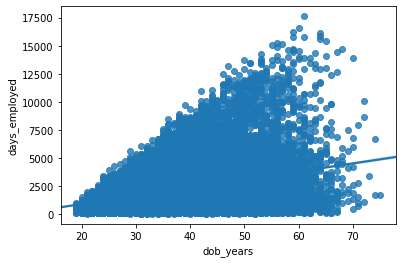

In [17]:
sns.regplot(x="dob_years", y="days_employed", data=credit_df[(credit_df['days_employed'] <= 18388.9) & (credit_df['dob_years'] > 0)])

Как мы видим, здесь нарушается требование гомоскедастичности остатков - с увеличением переменной 'dob_years' значения 'days_employed' располагаются все дальше от регрессионной прямой.

Мы видим, что существует достаточно много наблюдений, у которых возраст человека более 50 лет, а трудовой стаж не превышает год. Попробуем отобрать наблюдения, где возраст более 50 лет, человек является сотрудником или госслужащим, чей стаж не превышает 4 лет, после чего отсортируем значения по возрастанию переменной 'days_employed', это поможет нам понять, в чем причина увеличения дисперсии в данных.

In [18]:
credit_df[(credit_df['days_employed'] <= 1460) & (credit_df['dob_years'] > 50) & (credit_df['income_type'].isin(['сотрудник', 'госслужащий']))].sort_values('days_employed')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
18880,0,58.276481,52,среднее,1,женат / замужем,0,F,сотрудник,0,92483.579152,строительство недвижимости
15692,2,81.571681,56,среднее,1,Не женат / не замужем,4,F,сотрудник,0,163533.194058,строительство собственной недвижимости
16336,0,93.746886,55,высшее,0,женат / замужем,0,F,сотрудник,0,195146.845757,автомобили
9256,0,100.309421,62,Среднее,1,Не женат / не замужем,4,F,сотрудник,0,83624.373410,покупка жилой недвижимости
15851,0,103.967950,59,среднее,1,женат / замужем,0,F,сотрудник,0,351703.426584,строительство собственной недвижимости
...,...,...,...,...,...,...,...,...,...,...,...,...
18812,0,1457.006384,52,среднее,1,женат / замужем,0,F,сотрудник,0,482612.934778,покупка жилой недвижимости
8751,0,1457.631100,59,высшее,0,гражданский брак,1,M,сотрудник,0,199707.205517,свадьба
14329,0,1458.212635,54,среднее,1,женат / замужем,0,M,сотрудник,1,144507.257173,жилье
17452,0,1458.640105,52,высшее,0,женат / замужем,0,F,госслужащий,0,84122.101927,операции с коммерческой недвижимостью


Мы видим, что существует 668 наблюдений, где люди являются возрастными (более 50 лет) сотрудниками или госслужащими, а стаж их работы не превышает 4 лет. Причем у 160 наблюдений стаж работы не превышает и 1 года. Конечно, можно предположить, что эти люди ближе к пенсионному возрасту занялись своей карьерой. Однако, вероятнее всего, это обусловлено тем, что данные занесены некорректно. Это и может быть основной причиной увеличения дисперсии при увеличении значения переменной dob_years.

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Здорово, что ты так подробно проанализировал данную взаимосвязь параметров. А почему у нас получается такой веер, почему чем правее мы идем, тем больше дисперсия значений?

</div>

Идею использования линейной регрессии для корректировки аномально высоких значений, а также заполнения пропущенных значений отклоняем.

В качестве альтернативного способа можно рассчитать медианные значения, которые не чувствительны к выбросам, с группировкой по переменной income_type (для групп 'сотрудник', 'пенсионер', 'компаньон', 'госслужащий', 'безработный', 'предприниматель', 'студент', 'в декрете')

In [19]:
credit_df.groupby('income_type', as_index=False)[['days_employed', 'dob_years', 'total_income']].median()

,income_type,days_employed,dob_years,total_income
0,безработный,366413.652744,38.0,131339.751676
1,в декрете,3296.759962,39.0,53829.130729
2,госслужащий,2689.368353,40.0,150447.935283
3,компаньон,1547.382223,39.0,172357.950966
4,пенсионер,365213.306266,60.0,118514.486412
5,предприниматель,520.848083,42.5,499163.144947
6,сотрудник,1574.202821,39.0,142594.396847
7,студент,578.751554,22.0,98201.625314


In [20]:
# Выведем значения по классу безработный

credit_df[(credit_df['income_type'] == 'безработный')]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
3133,1,337524.466835,31,среднее,1,женат / замужем,0,M,безработный,1,59956.991984,покупка жилья для сдачи
14798,0,395302.838654,45,Высшее,0,гражданский брак,1,F,безработный,0,202722.511368,ремонт жилью


In [21]:
# Посмотрим, в каких диапазонах находятся значения 'days_employed' для пенсионеров

credit_df[(credit_df['income_type'] == 'пенсионер')]['days_employed'].describe()

count      3443.000000
mean     365003.491245
std       21069.606065
min      328728.720605
25%      346649.346146
50%      365213.306266
75%      383231.396871
max      401755.400475
Name: days_employed, dtype: float64

<div class="alert alert-danger">
<h2> Комментарий ревьюера </h2>

Если приводишь графики в работе, то не забывай подписывать оси, а также делать названия рисункам. Без этого порой непонятно, что именно ты анализируешь. 

</div>

<font color=green>
<h2> Комментарий студента</h2>

Согласен! В данном случае все же лучше обойтись без графика, чтобы не перегружать ими работу

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Ок. Круто, что ты уже сейчас используешь seaborn, хотя графики в работе не подразумеваются. 

</div>

В наших данных имеются 2 безработных человека со стажем 337524 и 395302, что соответствует 924 и 1083 годам трудового стажа соотвественно. В данном случае мы не можем исправить значения на медианные по 'total_income' = 'безработный', т.к. отсутствуют корректные наблюдения по данному классу.

Также мы установили, что трудовой стаж пенсионеров находится в диапазоне от 328 728 до 401 755 дней (или же от 901 до 1101 года). То есть все значения трудового стажа для категории 'пенсионер' некорректны.

По условиям задания у нас нет необходимости анализировать влияние стажа работы на то, выплатит человек кредит или нет. Исходя из этого, можно убрать переменную 'days_employed', т.к. она не представляет интереса для анализа

In [22]:
credit_df = credit_df.drop(['days_employed'], axis=1)

Далее посмотрим, какие значения принимает переменная 'dob_years'

In [23]:
credit_df.dob_years.describe()

count    21525.000000
mean        43.293380
std         12.574584
min          0.000000
25%         33.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

Мы обнаружили ещё одну аномалию - возраст, который равен нулю. Попробуем посмотреть, сколько таких наблюдений

In [24]:
credit_df[credit_df['dob_years'] == 0]

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,0,Среднее,1,женат / замужем,0,F,пенсионер,0,71291.522491,автомобиль
149,0,0,среднее,1,в разводе,3,F,сотрудник,0,70176.435951,операции с жильем
270,3,0,среднее,1,женат / замужем,0,F,сотрудник,0,102166.458894,ремонт жилью
578,0,0,среднее,1,женат / замужем,0,F,пенсионер,0,97620.687042,строительство собственной недвижимости
1040,0,0,высшее,0,в разводе,3,F,компаньон,0,303994.134987,свой автомобиль
...,...,...,...,...,...,...,...,...,...,...,...
19829,0,0,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,жилье
20462,0,0,среднее,1,женат / замужем,0,F,пенсионер,0,259193.920299,покупка своего жилья
20577,0,0,среднее,1,Не женат / не замужем,4,F,пенсионер,0,129788.762899,недвижимость
21179,2,0,высшее,0,женат / замужем,0,M,компаньон,0,240702.007382,строительство жилой недвижимости


В наших данных имеется 101 (что составляет 0,5% от общего количества наблюдений) строка, где переменная возраст равна нулю, однако у этих людей имеется трудовой стаж и доход. Очевидно, что ошибка повилась случайно, и относится к MNAR (Missing Not At Random): механизм формирования пропусков, при котором данные отсутствуют в зависимости от неизвестных факторов. Можно предположить, что ошибка возникла на этапе экспорта данных из какого-либо программного комплекса, который установлен в банке.

Избавимся от нулевых значений в переменной 'dob_years'.

In [1]:
# credit_df.loc[credit_df.dob_years == 0, 'dob_years'] = credit_df.groupby('income_type')['dob_years'].apply(lambda x: x.median())

In [25]:
for element in credit_df.groupby('income_type').mean().index:
    credit_df.loc[(credit_df.dob_years == 0) & (credit_df.income_type == element), 'dob_years'] = credit_df.loc[(credit_df.income_type == element) & (credit_df.dob_years != 0), 'dob_years'].median()

In [40]:
credit_df.dob_years.describe()

count    21424.000000
mean        43.497479
std         12.246934
min         19.000000
25%         33.000000
50%         43.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

In [26]:
# Проверим, что изменения выполнены корректно

credit_df.dob_years.describe()

count    21525.000000
mean        43.496167
std         12.231538
min         19.000000
25%         34.000000
50%         43.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

Теперь нулевые значения возраста отсутствуют.

Проверим другие переменные на наличие аномалий в порядке расположения столбцов в таблице

In [27]:
credit_df.education.value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64

Необходимо унифицировать значения. Для этого воспользуемся методом .str.lower()

In [28]:
credit_df.education = credit_df.education.str.lower()

In [29]:
# Проверим корректность выполненных преобразований

credit_df.education.value_counts()

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

Унификация значений переменной 'education' выполнена корректно

In [30]:
credit_df.education_id.value_counts()

1    15233
0     5260
2      744
3      282
4        6
Name: education_id, dtype: int64

В переменной 'education_id' аномальных значений не выявлено

In [31]:
credit_df.family_status.value_counts()

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

В переменной 'family_status' аномальных значений не выявлено, однако, для единообразия можно переписать категорию 'Не женат / не замужем', чтобы она начиналась со строчной буквы.

In [32]:
credit_df.loc[credit_df.family_status == 'Не женат / не замужем', 'family_status'] = 'не женат / не замужем'

In [33]:
# Проверим получившиеся значения

credit_df.family_status.value_counts()

женат / замужем          12380
гражданский брак          4177
не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

In [34]:
credit_df.family_status_id.value_counts()

0    12380
1     4177
4     2813
3     1195
2      960
Name: family_status_id, dtype: int64

В переменной 'family_status_id' аномальных значений не выявлено

In [35]:
credit_df.gender.value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

In [36]:
credit_df[credit_df.gender == 'XNA']

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,24.0,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости


Мы нашли одно наблюдение, в котором значение переменной 'gender' - XNA.  В данном случае можно удалить наблюдение без опасений потерять важные данные, других наблюдений со значением переменной 'income_type' == компаньон достаточно много

In [37]:
credit_df = credit_df[credit_df.gender != 'XNA']

In [38]:
# проверяем корректность удаления строки

credit_df.gender.value_counts()

F    14236
M     7288
Name: gender, dtype: int64

Строка с некорректным значением переменной 'gender' исключена из таблицы

In [39]:
credit_df.income_type.value_counts()

сотрудник          11119
компаньон           5084
пенсионер           3856
госслужащий         1459
предприниматель        2
безработный            2
в декрете              1
студент                1
Name: income_type, dtype: int64

В переменной 'income_type' аномальные значения отсутствуют

In [40]:
credit_df.debt.value_counts()

0    19783
1     1741
Name: debt, dtype: int64

В переменной 'debt' аномальные значения отсутствуют

In [41]:
credit_df.purpose.value_counts()

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
операции с жильем                         653
покупка жилья для сдачи                   653
операции с коммерческой недвижимостью     651
жилье                                     647
покупка жилья                             647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      623
строительство недвижимости                620
покупка своего жилья                      620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

В переменной purpose имеется много повторов, которые будут устранены на этапе лемматизации

### Вывод

На стадии идентификации и обработки аномальных значений мы избавились от ряда проблем:

1) ошибочно введенные отрицательные значения (у некоторых наблюдений был -1 ребенок) переменной 'children', а также аномально большие значения (у ряда наблюдений было по 20 детей);

2) переменную 'days_employed' мы исключили. Несмотря на то, что при выдаче кредита стаж имеет, как правило, важное значение, для целей текущего анализа, он не представляет большого интереса

3) в переменной dob_years избавились от нулевых значений, записав вместо них медианные значения, рассчитанные для каждого класса в отдельности

4) унифицировали значения переменной education

5) в переменной 'gender' было одно значение, где вместо пола записано 'XNA'. Было принято решение удалить наблюдение (строку) с некорректным значением пола

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Параметр с образованием не унифицирован. Лучше это сделать в данном разделе, а не ниже. Пожалуйста, следи за структурой работы. 

</div>

<font color=green>
<h2> Комментарий студента</h2>

Спасибо! Исправил)

### Обработка пропусков

Прежде чем приступить к обработке пропусков, посчитаем их количество для каждой переменной

In [42]:
credit_df.isnull().sum()

children               0
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Как мы видим, пропущенные значения имеются в переменной total_income. Вероятнее всего, причиной тому послужили технические проблемы: трудно представить, что клиент, пытаясь получить кредит, намеренно не указал свой уровень дохода, который является очень важным фактором при принятии решения о выдаче кредита.

Существует несколько возможных способов обработки пропусков: 

1) удалить наблюдения с пропущенными значениями

2) заполнить пропущенные значения среднеарифметическими значениями

3) заполнить пропущенные значения медианными значениями

4) использовать линейную регрессию или стохастическую линейную регрессию

В данном случае, можно определить механизм формирования пропусков как MNAR (Missing Not At Random): механизм формирования пропусков, при котором данные отсутствуют в зависимости от неизвестных факторов.

При MNAR просто игнорировать или исключить наблюдения с пропусками в данном случае нельзя, так как это приведет к значительному искажению распределения статистических свойств выборки, тем более, что мы можем потерять много важных наблюдений - 2174 шт.

Вариант с испоьзованием линейной регрессии отклоняется, т.к. ранее было установлено, что между переменной 'total_income' и другими переменными нет линейных зависимостей

Определим, при каких значениях переменной 'income_type' имеются пропущенные значения

In [43]:
credit_df[credit_df.total_income.isnull()]['income_type'].value_counts()

сотрудник          1105
компаньон           508
пенсионер           413
госслужащий         147
предприниматель       1
Name: income_type, dtype: int64

Установим медианные значения дохода в зависимости от значения переменной 'income_type'

In [44]:
credit_df.groupby(['income_type', 'education'])['total_income'].median()

income_type      education          
безработный      высшее                 202722.511368
                 среднее                 59956.991984
в декрете        среднее                 53829.130729
госслужащий      высшее                 172511.107016
                 начальное              148339.290825
                 неоконченное высшее    160592.345303
                 среднее                136652.970357
                 ученая степень         111392.231107
компаньон        высшее                 201785.400018
                 начальное              136798.905143
                 неоконченное высшее    179300.112554
                 среднее                159070.690289
пенсионер        высшее                 144240.768611
                 начальное              102598.653164
                 неоконченное высшее    120136.896353
                 среднее                114842.854099
                 ученая степень         177088.845999
предприниматель  высшее                 49916

Избавимся от пропущенных значений с помощью цикла в цикле. В зависимости от значения переменных 'education' и 'income_type', присвоим пропущщеным значениям медианные значения по соответствующим группам

In [45]:
credit_df.loc[credit_df.total_income.isnull(), 'total_income'] = credit_df.groupby(['income_type', 'education'])['total_income'].apply(lambda x: x.fillna(x.median()))

In [46]:
# Проверим, что пропущенных значений не осталось

credit_df.isnull().sum()

children            0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Верно, можно и одной строкой. После группировки пропиши .apply(lambda x: x.fillna(x.median())). Так мы применим фукнцию для заполнения пропусков медианным значением в каждой из групп. 
   

</div>

<font color=green>
<h2> Комментарий студента</h2>

Спасибо! Вот это очень круто! Немного потупил и сначала неправильно применял .apply, но потом разобрался)

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Это достаточно нетривиальный способ обработки пропусков. На мой взгляд, вполне можно реализовать и через цикл. Его точно поймут все)

</div>

### Вывод

В датафрэйме имелось 2174 пропущенных значений в переменной. Мы определили механизм формирования пропусков как MNAR (Missing Not At Random): механизм формирования пропусков, при котором данные отсутствуют в зависимости от неизвестных факторов.

При MNAR просто игнорировать или исключить наблюдения с пропусками в данном случае нельзя, так как это приведет к значительному искажению распределения статистических свойств выборки, тем более, что мы можем потерять много важных наблюдений - 2174 шт.

От пропущенных значений избавились с помощью медианных значений, устойчивых к выбросам, которые рассчитаны в зависимости от значений переменных 'education' и 'income_type'

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Пропуски ты обработал верно. Конечно, доход сильно зависит от типа занятости клиента. Здорово, что так подробно проведена работа по поиску необходимого способа обработки пропусков. 

</div>

<font color=green>
<h2> Комментарий студента</h2>

Спасибо, Артём, очень приятно:)

### Замена типа данных

Необходимо выполнить замену вещественного типа данных на целочисленный для переменных 'dob_years' и 'total_income'. Для этого применим метод .astype('int') к столбцам 'dob_years' и 'total_income'.

In [47]:
credit_df['dob_years'] = credit_df['dob_years'].astype('int')
credit_df['total_income'] = credit_df['total_income'].astype('int')

In [48]:
# Проверим корректность преобразований

credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 11 columns):
children            21524 non-null int64
dob_years           21524 non-null int64
education           21524 non-null object
education_id        21524 non-null int64
family_status       21524 non-null object
family_status_id    21524 non-null int64
gender              21524 non-null object
income_type         21524 non-null object
debt                21524 non-null int64
total_income        21524 non-null int64
purpose             21524 non-null object
dtypes: int64(6), object(5)
memory usage: 2.6+ MB


### Вывод

Мы преобразовали тип данных в переменных 'dob_years' и 'total_income' с вещественного типа на целочисленный с помощью метода .astype('int').

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Исходя из общей информации о таблице мы видим, что два столбца имеют вещественный тип данных, который и надо заменить на целочисленный. Эта замена произведена верно. Также хорошо бы освоить метод to_numeric() для будущих работ. 

</div>

<font color=green>
<h2> Комментарий студента</h2>

Решил не откладывать на потом, а сделать сейчас с помощью to_numeric(). Единственное, у меня возникла проблема, и к сожалению, не смог понять, почему так. В случае с credit_df['dob_years'] = pd.to_numeric(credit_df['dob_years'], downcast='integer') все нормально, переводит float в int. В случае с credit_df['total_income'] = pd.to_numeric(credit_df['total_income'], downcast='integer') - вообще почему-то никак не хочет, хотя по идее это же то же самое, в чем может быть причина? Пока что эту часть кода закомментил и сделал так, как было

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

В данном случае to_numeric мы использовать не сможем. Данный метод переводит числа из str в int или float, преобразует текстовый формат в числовой. У нас же другая ситуация. Указал данный метод, поскольку также важно уметь работать с ним, он пригодится в последующих работах.

</div>

### Обработка дубликатов

Необходимо установить наличие дубликатов. Это можно сделать с помощью методов .duplicated().sum(), которые просуммируют количество дубликатов

In [49]:
credit_df.duplicated().sum()

71

Избавимся от дубликатов с помощью метода .drop_duplicates(), перезаписав датафрэйм

In [50]:
credit_df = credit_df.drop_duplicates().reset_index(drop=True)

In [51]:
# Проверим на корректность удаления дубликатов

credit_df.duplicated().sum()

0

### Вывод

Вероятно, дубликаты появились вследствие сбоя на этапе записи данных. Для поиска количества дубликатов мы использовали метод .duplicated().sum(). Избавились от дубликатов с помощью метода .drop_duplicates()

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Дубликаты вызывают смещение финальных результатов, поэтому их и надо удалять. Конечно, в данных нет уникального идентификатора, однако надо уметь удалять дубликаты. Метод drop_duplicates() использован верно.

</div>

### Лемматизация

Как было обнаружено выше, в переменной 'purpose', где приведено описание цели получения кредита для каждого наблюдения, имеются повторы. Приведем несколько примеров

In [52]:
credit_df.purpose.value_counts()

свадьба                                   791
на проведение свадьбы                     768
сыграть свадьбу                           765
операции с недвижимостью                  675
покупка коммерческой недвижимости         661
операции с жильем                         652
покупка жилья для сдачи                   651
операции с коммерческой недвижимостью     650
покупка жилья                             646
жилье                                     646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          624
покупка недвижимости                      620
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

Например, имеются значения: 'свадьба', 'на проведение свадьбы', 'сыграть свадьбу', которые по факту должны быть объединены в одно слово/фразу, т.к. описывают одну и ту же цель получения кредита. Для того, чтобы решить эту проблему воспользуемся лемматизацией.

Исходя из полученных результатов, цели можно классифицировать следующим образом:

* свадьба
* покупка недвижимости
* ремонт недвижимости
* автомобиль
* образование

In [53]:
# Импорт библиотеки для лемматизации

from pymystem3 import Mystem

In [54]:
def lemmatization(df, column):
    for unique_element in column.value_counts().index:
        text = unique_element
        m = Mystem()
        lemmas = m.lemmatize(text)
        if ('жилье' in lemmas) or ('недвижимость' in lemmas):
            df.loc[(column == text), 'purpose'] = 'недвижимость'
        elif 'автомобиль' in lemmas:
            df.loc[(column == text), 'purpose'] = 'автомобиль'
        elif 'свадьба' in lemmas:
            df.loc[(column == text), 'purpose'] = 'свадьба'
        elif 'образование' in lemmas:
            df.loc[(column == text), 'purpose'] = 'образование'
    return df

In [55]:
credit_df = lemmatization(credit_df, credit_df.purpose)

In [56]:
# Проверяем корректность лемматизации

credit_df.purpose.value_counts()

недвижимость    10810
автомобиль       4306
образование      4013
свадьба          2324
Name: purpose, dtype: int64

### Вывод

В результате лемматизации мы избавились от многочисленных повторов. Лемматизация проводилась с помощью библиотеки Mystem. В цикле перебирались уникальные значения  переменной 'purpose' с их последующей заменой на одно из значений: ремонт недвижимости', 'покупка недвижимости', 'автомобиль', 'свадьба', 'образование'.

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Круто, ты сделал самую сложную часть проекта. Использовал нужные методы, и даже провел группировку с помощью собственной функции. Подумай, стоит ли выделять цель ремонта. В нее попадает не так много клиентов. Также будет ли такая формулировка цели кредита важна для банка?

</div>

<font color=green>
<h2> Комментарий студента</h2>

Согласен, лучше все объединить в категорию "недвижимость". Также все же лучше сделать это отдельной функцией

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Можно и оставить, если для банка важна данная цель. В этом как раз у меня и есть большие сомнения. Ремонт машины также возможен.  

</div>

### Категоризация данных

Работать с единичными отрывками и делать из них статистические выводы нельзя. Значит, нужно сгруппировать данные, чтобы численности каждой группы хватало для формулировки выводов.
Нужна категоризация — объединение данных в категории. Создадим категориальные переменные на основе столбцов 'dob_years' и 'total_income'.

Для того, чтобы оптимально хранить информацию о категориях,
создаётся отдельный файл-словарь, названию категории соответствует
номер. Этот номер в дальнейшем используется вместо текстового
наименования категории в таблице.

Заметим, что в наших данных имеются данные-словари. Например, у каждого уровня образования в таблице 'credit_df' есть свой уникальный 'education_id'. Также еще одним словарем может быть семейный статус заемщика: каждому семейному статусу соответствует столбец 'family_status_id'.

In [57]:
# Создадим первый словарь с уровнем образования

education_dict = credit_df[['education_id', 'education']]

In [58]:
education_dict

,education_id,education
0,0,высшее
1,1,среднее
2,1,среднее
3,1,среднее
4,1,среднее
...,...,...
21448,1,среднее
21449,1,среднее
21450,1,среднее
21451,1,среднее


Очевидно, в наших данных в словаре большое количество дубликатов. Их нужно удалить. Применим знакомую цепочку методов: drop_duplicates() и reset_index().

In [59]:
education_dict = education_dict.drop_duplicates().reset_index(drop=True)

In [60]:
education_dict

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


Мы успешно избавились от дубликатов. Выполним те же операции для создания словаря с семейным статусом.

In [61]:
family_dict = credit_df[['family_status_id', 'family_status']]

In [62]:
family_dict = family_dict.drop_duplicates().reset_index(drop=True)

In [63]:
family_dict

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,не женат / не замужем


Мы создали 2 словаря, в которых каждому значению-наименованию соответствует числовой ключ

<div class="alert alert-success">
<h2> Комментарий ревьюера 3</h2>

Да, именно такие словари нам и нужны. Теперь мы можем убрать текстовый параметр из основной таблицы для увеличения эффективности работы с ней.  

</div>

In [64]:
credit_df

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,недвижимость
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,автомобиль
2,0,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,недвижимость
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,образование
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,свадьба
...,...,...,...,...,...,...,...,...,...,...,...
21448,1,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,недвижимость
21449,0,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,автомобиль
21450,1,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость
21451,3,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,автомобиль


Выделим отдельные категории в наших данных: категории для возраста и для дохода.

Колонку 'age_group' сформируем следующим образом: объединим в категории по возрастам:
* Возраст до 22 лет - студенты
* Возраст до 64 лет - взрослые
* Возраст свыше 64 лет - пенсионеры

Для формирования колонки с возрастной категорией создадим отедльную функцию. Для обработки потенциальных ошибок применим конструкцию try-except.

In [65]:
def age_group(age):
    try:
        if age <= 22:
                return 'студенты'
        if age <= 64:
                return 'взрослые'
        return 'пенсионеры'
    except:
        print('Категоризация не выполнена. Проверьте передаваемое в функцию значение')
        return

In [66]:
credit_df.loc[:, 'age_group'] = credit_df.loc[:, 'dob_years'].apply(age_group)

In [67]:
# Проверим корректность добавления столбца

credit_df.head()

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,недвижимость,взрослые
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,автомобиль,взрослые
2,0,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,недвижимость,взрослые
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,образование,взрослые
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,свадьба,взрослые


Категоризируем значения в столбце 'total_income'. Одним из вариантов категоризации может служить метод .qcut() - метод разделяет переменную на сегменты одинакового размера на основе ранга или квантилей выборки.

In [68]:
# Посмотрим на значения квартилей

pd.qcut(credit_df['total_income'], 3)

0          (173161.0, 2265604.0]
1        (20666.999, 119872.667]
2         (119872.667, 173161.0]
3          (173161.0, 2265604.0]
4         (119872.667, 173161.0]
                  ...           
21448      (173161.0, 2265604.0]
21449     (119872.667, 173161.0]
21450    (20666.999, 119872.667]
21451      (173161.0, 2265604.0]
21452    (20666.999, 119872.667]
Name: total_income, Length: 21453, dtype: category
Categories (3, interval[float64]): [(20666.999, 119872.667] < (119872.667, 173161.0] < (173161.0, 2265604.0]]

 В качестве параметров используем labels, который ибавит от необходимости создавать отдельную функцию под категоризацию.

In [69]:
credit_df['income_group'] = pd.qcut(credit_df['total_income'], 3, labels=['низкий', 'средний', 'высокий'])

In [70]:
# Проверим правильность применения метода .qcut()

credit_df.head()

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,income_group
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,недвижимость,взрослые,высокий
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,автомобиль,взрослые,низкий
2,0,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,недвижимость,взрослые,средний
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,образование,взрослые,высокий
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,свадьба,взрослые,средний


In [71]:
# Посмотрим, сколько наблюдений вошли в каждую из категорий

credit_df.groupby('income_group')['income_group'].count()

income_group
низкий     7151
средний    7151
высокий    7151
Name: income_group, dtype: int64

В каждую группу вошло равное число наблюдений

### Вывод

На основе имеющихся данных мы сформировали 2 словаря: словарь, который хранит информацию об уровне образования, а также словарь с информацией о семейном статусе

Также была произведена категоризация данных на основании возраста. Мы выбрали 3 категории на основании возраста заёмщиков:

* Возраст до 22 лет - студенты
* Возраст до 64 лет - взрослые
* Возраст свыше 64 лет - пенсионеры

Также для дальнейшего анализа и поиска зависимости наличия задолженности по кредиту от получаемого дохода, нам необходимо категоризировать данные в зависимости от дохода. Мы выделили 3 категории дохода с помощью метода .qcut():

* доход до 119 873 - низкий
* доход от 119 873 до 173 161 - средний
* доход свыше 173 161 - высокий

<div class="alert alert-danger">
<h2> Комментарий ревьюера </h2>

Исходя из чего выбран именно такой способ категоризации столбца с доходами? Не во всех группах содержится достаточное число клиентов для построения по ним надежных выводов. Лучше использовать разбиение по квантилям данных (метод qcut). Тогда группы получатся одинакового размера. Или же можно узнать в интернете процентный состав общества по доходам и затем уже категоризовать столбец с доходами по найденному соотношению с помощью персентилей. 

</div>

<div class="alert alert-danger">
<h2> Комментарий ревьюера </h2>

В данных есть словари. Попробуй их обнаружить и выделить. Это довольно распространенный способ хранения информации. Мне важно понять, что ты его освоил. 

</div>

<font color=green>
<h2> Комментарий студента</h2>

Спасибо за отличный метод .qcut()! Надеюсь, правильно понял замечания и сделал то, что требовалось)

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Категоризация клиентов по уровню дохода сделана верно. Так выделяемые группы у нас будут равного размера. Можно даже увеличить число групп. 

</div>

<div class="alert alert-danger">
<h2> Комментарий ревьюера 2</h2>

А вот со словарями не совсем. Смотри, это такая структура хранения информации, где есть ключ и значение. Например, 1:мужчина, 2:женщина. Есть ли похожие параметры в основной таблице, отвечающие по сути за одно и то же? Их как раз и надо выделить в отдельную таблицу. Попробуй это реализовать. 

</div>

<font color=green>
<h2> Комментарий студента 2</h2>

Все, теперь понял и исправил)

### Шаг 3. Ответьте на вопросы <a class="anchor" id="fourth-bullet"></a>

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

Построим сводную таблицу с помощью метода .pivot_table()

In [72]:
data_pivot_children = credit_df.pivot_table(index=['children'], columns='debt', values='dob_years', aggfunc='count')

In [73]:
data_pivot_children['proportion'] = data_pivot_children[1] / (data_pivot_children[0] + data_pivot_children[1])

In [74]:
data_pivot_children

debt,0,1,proportion
children,,,
0,13027.0,1063.0,0.075444
1,4410.0,445.0,0.091658
2,1926.0,202.0,0.094925
3,303.0,27.0,0.081818
4,37.0,4.0,0.097561
5,9.0,NaN,NaN


Для расчета доли просрочек по кредиту для заемщиков с 5 детьми мы имеем крайне мало наблюдений, а также отсутствуют заемщики с просрочками по выплатам.

Рассчитав доли, мы можем судить о том, в каком проценте случаев заемщик не платит по кредиту вовремя, умножив значение долей на 100%.

В случае, если нет детей, то задолженность наступает в 8,2% случаев. Сравним со средним показателем, если имеется хотя бы 1 ребенок

In [75]:
round((445 + 202 + 27 + 4) / (4410 + 1926 + 303 + 37 + 9 + 445 + 202 + 27 + 4), 3)

0.092

### Вывод

В целом можно сказать, что существует зависимость между количеством детей и возвратом кредита в срок: в случае, если у заемщика нет детей, то он просрачивает выплату по кредиту в 7,5% случаев, в то время, как в среднем, если у заемщика есть хотя бы один ребенок, то просрочка по кредиту наступает в 9,2% случаев.

Также имеется тенденция: чем больше детей, тем выше вероятность, что должник просрочит выплаты по кредиту. Исключением являются должники, у которых 3 ребенка, что, вероятно, обусловлено недостаточным количеством данных.

Наличием зависимости между количеством детей и платежами по кредиту в срок является то, что с увеличением числа детей у заемщиков вырастают финансовые обязательства, и им труднее платить по кредитам в срок.

<div class="alert alert-danger">
<h2> Комментарий ревьюера </h2>

Категоризовать данные по числу детей необязательно. Разбиение есть уже в исходных данных. Все-таки разница в возврате кредита у семей с одним ребенком или тремя детьми будет. Так ты только уменьшаешь объем имеющейся информации. Посмотри на результат по полным данным. 

</div>

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

Построим сводную таблицу с помощью метода .pivot_table()

In [76]:
data_pivot_family_status = credit_df.pivot_table(index=['family_status'], columns='debt', values='dob_years', aggfunc='count')

In [77]:
data_pivot_family_status['proportion'] = data_pivot_family_status[1] / (data_pivot_family_status[0] + data_pivot_family_status[1])

In [78]:
data_pivot_family_status

debt,0,1,proportion
family_status,,,
в разводе,1110,85,0.071130
вдовец / вдова,896,63,0.065693
гражданский брак,3762,388,0.093494
женат / замужем,11408,931,0.075452
не женат / не замужем,2536,274,0.097509


Рассчитав доли в 3 столбце, мы можем судить о том, в каком проценте случаев заемщик не платит по кредиту вовремя, умножив значение долей на 100%.

### Вывод

Можно сказать, что существует зависимость между семейным положением и возвратом кредита в срок. Люди, которые являются вдовцом / вдовой имеют просрочки по кредиту лишь в 7% случаев, в разводе - в 6,6% случаев, в гражданском браке люди имеют просрочки по платежам существенно чаще - в 9,3% случаев, если заемщик женат / замужем - в 7,5 % случаев, а если заемщик не женат, то в 9,8% случаев он может не сделать платеж по кредиту в срок.

<div class="alert alert-danger">
<h2> Комментарий ревьюера </h2>

Откуда взяты проценты, если в расчетах их нет? Не следует приводить в выводах того, чего выше нет. 
    
Графики нам особо не помогают в анализе. Необходимости в них тут нет. Также не забывай про подписи осей и названия рисунков. 

</div>

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Построим сводную таблицу с помощью метода .pivot_table()

In [79]:
data_pivot_income_group = credit_df.pivot_table(index=['income_group'], columns='debt', values='dob_years', aggfunc='count')

In [80]:
data_pivot_income_group['proportion'] = data_pivot_income_group[1] / (data_pivot_income_group[0] + data_pivot_income_group[1])

In [81]:
data_pivot_income_group

debt,0,1,proportion
income_group,,,
низкий,6571,580,0.081108
средний,6519,632,0.088379
высокий,6622,529,0.073976


Рассчитав доли в 3 столбце, мы можем судить о том, в каком проценте случаев заемщик не платит по кредиту вовремя, умножив значение долей на 100%.

### Вывод

Удивительно, однако нельзя однозначно сказать, что при увеличении дохода процент просрочек по кредитным платежам гарантированно снижается. Например, в случае с нзким доходом задержки по кредитным платежам наступают в 8,1% случаев; если доход средний - в 8,8% случаев. Это может быть связано с тем, что с увеличением доходов люди, как правило, берут больше средств взаймы, вырастает долговая нагрузка. В варианте с высоким доходом есть тенденция к небольшому снижению просрочек по кредитным платежам - они происходят в 7,4% случаев.

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>

Посмотри на результаты при ином способе категоризации. 

</div>

- Как разные цели кредита влияют на его возврат в срок?

Построим сводную таблицу с помощью метода .pivot_table()

In [82]:
data_pivot_purpose = credit_df.pivot_table(index=['purpose'], columns='debt', values='dob_years', aggfunc='count')

In [83]:
data_pivot_purpose['proportion'] = data_pivot_purpose[1] / (data_pivot_purpose[0] + data_pivot_purpose[1])

In [84]:
data_pivot_purpose

debt,0,1,proportion
purpose,,,
автомобиль,3903,403,0.093590
недвижимость,10028,782,0.072340
образование,3643,370,0.092200
свадьба,2138,186,0.080034


<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Круто, метод сводных таблиц освоен. Он нам пригодится для дальнейших проектов. Смотри, доли не стоит рассчитывать вручную. Мы можем просто создать новый столбец в таблице, отвечающий за долю долга группы. Попробуй разделить столбец 0 на сумму 0 и 1. Так мы и получим новый параметр.

</div>

<font color=green>
<h2> Комментарий студента 2</h2>

Да, признаю, с .pivot_table существенно проще и приятнее работать, спасибо!

<div class="alert alert-warning">
<h2> Комментарий ревьюера 3</h2>

Только долю должников ты нашел не совсем точно. Нам надо поделить должников на число людей в группе. Ты же нашел пропорцию. По ней, конечно, также можно сделать выводы, однако банк все же будет интересовать именно доля должников. 

</div>

Для перехода к процентам используем данные в 3 столбце pivot-таблицы, и домножим их на 100%

### Вывод

Процент наличия задолженности в зависимости от целей кредита составляет:

* недвижимость - 7,2%
* автомобиль - 9,4%
* образование - 9,2%
* свадьба - 8%

Можно сказать, что различные цели кредита влияют на его возврат в срок. В случае кредитования для категории 'недвижимость', задолженность образуется реже. Это может быть связано с тем, что люди ответственнее подходят к получению кредита для недвижимости и менее ответственно при покупке квартиры или получения образования.

<div class="alert alert-danger">
<h2> Комментарий ревьюера </h2>

На данном шаге рекомендуется использовать метод сводных таблиц (pivot_table()). Он также является аналогом метода groupby(). Изучи метод сводных таблиц и примени его в анализе. Строить результат для каждой группы по отдельности не стоит. Их может быть слишком много. 

</div>

### Шаг 4. Общий вывод <a class="anchor" id="fifth-bullet"></a>

В ходе работы над проектом "Исследование надёжности заёмщиков" мы выполнили следующие этапы:

1. изучили общую информацию о файле
2. выполнили предобработку данных
3. ответили на поставленные вопросы

Одним из основных этапов работы перед тем, как ответить на вопросы о наличии или отсутствии зависимостей между различными переменными, а также возвратом кредита в срок, был этап предобработки данных, который состоял из нескольких стадий:

* идентификация и обработка аномальных значений
* определение и обработка пропущенных значений
* проведена замена вещественных типов данных на целочисленный
* удалены дубликаты
* выделены леммы в значениях столбца с целями получения кредита
* данные были категоризированы

На финальном этапе перед нами ставились следующие вопросы:

* Есть ли зависимость между наличием детей и возвратом кредита в срок?
* Есть ли зависимость между семейным положением и возвратом кредита в срок?
* Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
* Как разные цели кредита влияют на его возврат в срок?

В результате анализа была обнаружена завиимость между наличием детей и возвратом кредита в срок. Также с увеличением детей, как правило, чаще возникают просрочки по кредиту. Наличием зависимости между количеством детей и платежами по кредиту в срок является то, что с увеличением числа детей у заемщиков вырастают финансовые обязательства, и им труднее платить по кредитам.

Можно сказать, что существует зависимость между семейным положением и возвратом кредита в срок. Люди, которые являются вдовцом / вдовой имеют просрочки по кредиту лишь в 7% случаев, в разводе - в 7,7% случаев, в гражданском браке люди имеют просрочки по платежам существенно чаще - в 10,3% случаев, если заемщик женат / замужем - в 8,2 % случаев, а если заемщик не женат, то в 10,8% случаев он может не сделать платеж по кредиту в срок.

Мы с удивлением обнаружили, что зависимости между получаемым доходом и платежами по кредитам в срок почти нет и предположили, что так происходит из-за того, что с ростом доходов возрастают и запрашиваемые у банка средства.

Также существует небольшая зависимость между разными целями кредита и возвратом в срок: в случае кредитования для категории 'недвижимость', просрочки по платежам образуются реже. Это может быть связано с тем, что люди ответственнее подходят к получению кредита для недвижимости и менее ответственно при покупке квартиры или получения образования.

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Выводы описаны грамотно. Приведены ответы на главные вопросы проекта. В выводах можно приводить полученные ранее значения, верно. Также можно расписать все, что было сделано в ходе проведения работы. 

</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>

- В начале работы следует описывать данные, с которыми работаешь;
- Категоризацию по доходу стоит делать иначе. Смотри данный пункт подробнее;
- Выдели словари в данных;
- Используй методы группировки для получения ответов на поставленные в задании вопросы;
- Не забывай подписывать оси на графиках, а также делать им названия.

Ты проделал большую работу, молодец! Радует основательный подход к анализу с подробным описанием каждого шага. Это очень важно. Исправь отмеченные выше помарки. Жду твою работу :)

</div>

<font color=green>
<h2> Комментарий студента</h2>

Спасибо, Артём!) Надеюсь, на этот раз продвинулся чуточку дальше в сдаче проекта:)

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Ты проделал большую работу над помарками, молодец. Осталось лишь выделить словари в данных. Мне важно понять, что ты овладел данным способом работы с данными. Также попробуй создать столбец, отвечающий за долю должников. Как сделаешь это, присылай работу снова :)

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 3</h2>

Теперь все помарки исправлены, и теперь работа выполнена хорошо. Я рад, что ты справился со всеми трудностями проекта, молодец. Спасибо за обратную связь по замечаниям. Успехов в дальнейших проектах :)

</div>
   

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл;
- [x]  файл изучен;
- [x]  определены пропущенные значения;
- [x]  заполнены пропущенные значения;
- [x]  есть пояснение, какие пропущенные значения обнаружены;
- [x]  описаны возможные причины появления пропусков в данных;
- [x]  объяснено, по какому принципу заполнены пропуски;
- [x]  заменен вещественный тип данных на целочисленный;
- [x]  есть пояснение, какой метод используется для изменения типа данных и почему;
- [x]  удалены дубликаты;
- [x]  есть пояснение, какой метод используется для поиска и удаления дубликатов;
- [x]  описаны возможные причины появления дубликатов в данных;
- [x]  выделены леммы в значениях столбца с целями получения кредита;
- [x]  описан процесс лемматизации;
- [x]  данные категоризированы;
- [x]  есть объяснение принципа категоризации данных;
- [x]  есть ответ на вопрос: "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Как разные цели кредита влияют на его возврат в срок?";
- [x]  в каждом этапе есть выводы;
- [x]  есть общий вывод.